# Research Question: Has there been any changes on drug overdose deaths in the US over the years?

Datasource used: https://catalog.data.gov/dataset/drug-overdose-death-rates-by-drug-type-sex-age-race-and-hispanic-origin-united-states-3f72f

<br>
Procedure followed:<br>
Step 1: Understand data-set and it's different filters & dimensions.<br>
<br>
Step 2: Plot Data over-time and identify any major trends (i.e. spikes in percent increase).<br>
Assumption: Utilizing tralling 4 yrs average on y-axis.<br>
<br>
Step 3: Plot dimensions and quantify spikes to identify trends across dimensions on overdose deaths per 100k <br>(i.e. deaths rate per 100k == [ESTIMATE] field of datasource).<br>
Assumption: Comparing non-inclusive trailing 4 yr periods to identify spikes/outliers among periods.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#Extracting data-set
df5=pd.read_csv('Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States.csv')

#printing sample of whole data-set to get an initial feel on dimensions/granularity of data.


## Step 1: Data Exploration
We start with data exploration to understand data-set and level of granularity. Some key dimensions identified:<br>
(1) Drug Type Dimensions <br>
(2) Units Dimensions <br>
(3) Dimension Categories <br>
(4) Dimension Results <br>

In [69]:
df5.head(2) #priting sample of dataset to understand what variables/columns we have available

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,6.1,NaN
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN


In [6]:
#checking fields/values for each column to understand data granularity and fields.

unique_combinations = df5[['PANEL','PANEL_NUM']].drop_duplicates() #drug-type 
unique_combinations1 = df5[['UNIT','UNIT_NUM']].drop_duplicates() #unit-type
unique_combinations2 = df5[['STUB_NAME','STUB_NAME_NUM']].drop_duplicates() #dimension-category
unique_combinations3 = df5[['STUB_LABEL','STUB_LABEL_NUM']].drop_duplicates() #dimension-results

display('(1)Drug Type Dimensions:',unique_combinations),
display('(2)Units Dimensions:',unique_combinations1),
display('(3)Dimension Categories:',unique_combinations2),
display('(4)Dimension Results:',unique_combinations3)

'(1)Drug Type Dimensions:'

,PANEL,PANEL_NUM
0,All drug overdose deaths,0
987,Drug overdose deaths involving any opioid,1
1974,Drug overdose deaths involving natural and sem...,2
2366,Drug overdose deaths involving methadone,3
3948,Drug overdose deaths involving other synthetic...,4
3989,Drug overdose deaths involving heroin,5


'(2)Units Dimensions:'

,UNIT,UNIT_NUM
0,"Deaths per 100,000 resident population, age-ad...",1
33,"Deaths per 100,000 resident population, crude",2


'(3)Dimension Categories:'

,STUB_NAME,STUB_NAME_NUM
0,Total,0
19,Sex,2
58,Sex and race,4
218,Sex and race and Hispanic origin,5
438,Age,1
645,Sex and age,3
5925,Sex and race (single race),4
5931,Sex and race and Hispanic origin (single race),5


'(4)Dimension Results:'

,STUB_LABEL,STUB_LABEL_NUM
0,All persons,0.10
19,Male,2.10
39,Female,2.20
58,Male: White,4.10
78,Male: Black or African American,4.20
98,Male: American Indian or Alaska Native,4.30
118,Male: Asian or Pacific Islander,4.40
138,Female: White,4.50
158,Female: Black or African American,4.60
178,Female: American Indian or Alaska Native,4.70


## Step 2 : General view of trend
2.1) I first filtered the dataset to group overdose deaths by [Year]. These filters are important to avoid duplications of quantities given the different levels of granuality in the dataset. 
<br>
2.2) Calculate the 4-yr rolling average and use in y-axis to plot overdose deaths.
<br>
2.3) Plot is made to understand key trends/patterns.

In [7]:
#(2.1 section)
#filtering key dimensions in order to group overdose deaths by year 
df2=df5[(df5['PANEL_NUM']==0) #all-drug-types/overall
        & (df5['STUB_NAME']=='Total') 
        & (df5['UNIT_NUM']==2) #no age breakdown
        & (df5['STUB_LABEL']=='All persons')]

#(2.2 section)
#Calculating the rolling average and filtering to keep only essential columns from the original dataset 
df2=df2.sort_values(by='YEAR',ascending=True)
df2= df2[['YEAR', 'ESTIMATE']]
df2['ROLLING_AVG']=df2['ESTIMATE'].rolling(window=4).mean() #rolling_Avg based on trailing 4 years
df2['YoY Chng - Rolling Avg']=df2['ROLLING_AVG'].diff() #calculating YoY increment
df2

,YEAR,ESTIMATE,ROLLING_AVG,YoY Chng - Rolling Avg
420,1999,6.0,NaN,NaN
421,2000,6.2,NaN,NaN
422,2001,6.8,NaN,NaN
423,2002,8.2,6.800,NaN
424,2003,8.9,7.525,0.725
425,2004,9.4,8.325,0.800
426,2005,10.1,9.150,0.825
294,2006,11.5,9.975,0.825
427,2007,12.0,10.750,0.775
428,2008,12.0,11.400,0.650


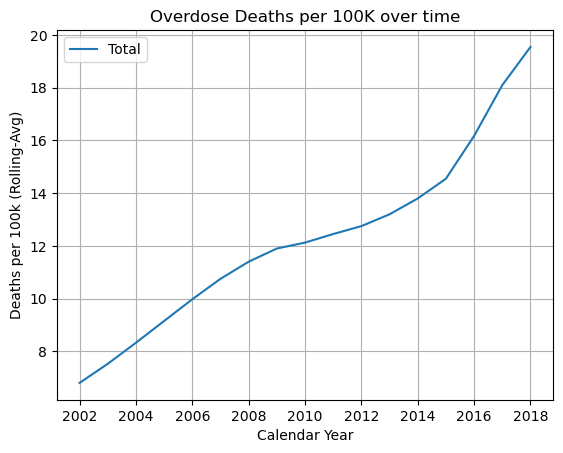

In [44]:
#(2.3 section)
#Plotting Estimated Overdose Deaths per 100k (Rolling 4-yr-Avg) to observe the trend over time.

x = np.floor(df2['YEAR'].unique())
y = df2['ROLLING_AVG']

plt.plot(x, y,label='Total')
plt.title('Overdose Deaths per 100K over time')
plt.xlabel('Calendar Year')
plt.ylabel('Deaths per 100k (Rolling-Avg)')
plt.legend()
plt.grid(True)
plt.show()

2.4) Below i am calculating the rolling average change/increase among non-inclusive rolling periods to identify the period with steepest change in deaths by overdose.

In [74]:
#(2.4 section) Calculating changes in overdose deaths for 4-year rolling averages (non-inclusive)
a=df2[(df2['YEAR']==2018)]['ROLLING_AVG'] 
b=df2[(df2['YEAR']==2013)]['ROLLING_AVG']
c=df2[(df2['YEAR']==2009)]['ROLLING_AVG'] 
d=df2[(df2['YEAR']==2005)]['ROLLING_AVG']

print("Rolling_2015_2018 minus(-) Rolling_2010_2013 =" ,round(float(a)-float(b),1))  #rounding to 1 dec place
print("Rolling_2010_2013 minus(-) Rolling_2006_2009 =" ,round(float(b)-float(c),1))  #rounding to 1 dec place
print("Rolling_2006_2009 minus(-) Rolling_2002_2005 =" ,round(float(c)-float(d),1))  #rounding to 1 dec place

Rolling_2015_2018 minus(-) Rolling_2010_2013 = 6.4
Rolling_2010_2013 minus(-) Rolling_2006_2009 = 1.3
Rolling_2006_2009 minus(-) Rolling_2002_2005 = 2.8


### Overall Period: Key Insight
The biggest change(increase) in death by overdose was post 2014 (i.e. +6.4).<br> Next, i will assess whether similar trends is observed across particular  dimensions on for pre vs post 2014 periods. <br> (i.e. comparing rolling 4-yr avg : 2015-2018 vs 2010-2013).

# Step 3.1: Age Dimension

In [8]:
#(3.1.2) Filtered the dataset to capture the data that groups death rate by age. Then plotting results.

ddf3=df5[(df5['PANEL_NUM']==0) #all-drug-types/overall
         & (df5['STUB_NAME']=='Age') #age-category-only
         & (df5['UNIT_NUM']==2)]

ddf4= ddf3[['YEAR','STUB_LABEL', 'ESTIMATE']]
ddf4 = ddf4.copy()
ddf4=ddf4.sort_values(by='YEAR',ascending=True)
#Below calculating rolling_Avg based on trailing 4 years and grouped by the STUB_LABEL DIMENSION (i.e. Age group).
ddf4['Rolling_Average'] = ddf4.groupby(['STUB_LABEL'])['ESTIMATE'].rolling(4).mean().reset_index(0, drop=True)
ddf4

,YEAR,STUB_LABEL,ESTIMATE,Rolling_Average
438,1999,Under 15 years,0.1,NaN
495,1999,35-44 years,14.0,NaN
514,1999,45-54 years,11.1,NaN
476,1999,25-34 years,8.1,NaN
457,1999,15-24 years,3.2,NaN
...,...,...,...,...
5948,2018,45-54 years,35.3,34.375
5949,2018,55-64 years,28.3,25.925
5950,2018,65-74 years,10.2,8.700
5951,2018,75-84 years,3.9,3.625


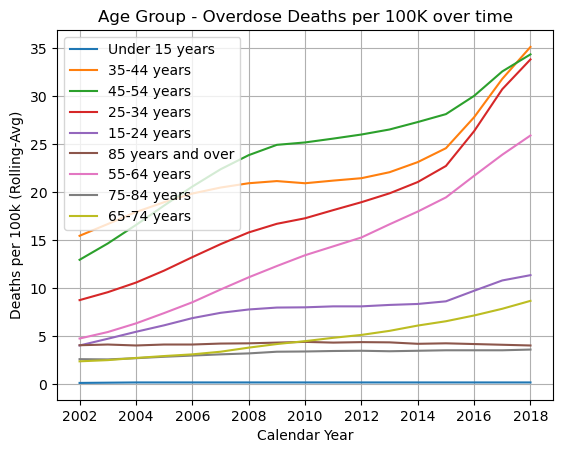

In [9]:
#(section 3.1.2 plotting..)
#Plotting overdose deaths per 100k (Rolling 4-yr-Avg) with age group breakdown
labels=ddf4['STUB_LABEL'].unique()
labels=labels.tolist()
data = {}
x = ddf4['YEAR'].unique()

#Setting up loop in order to be able to plot the different [STUB_LEVEL] values (i.e. age groups) separately under same x-axis.
for label in labels:
    ddff=ddf4[ddf4['STUB_LABEL']==label]
    y=ddff['Rolling_Average']
    data[label]=y
    
for label, y in data.items():
    plt.plot(x, y, label=label)

plt.legend()
plt.title('Age Group - Overdose Deaths per 100K over time')
plt.xlabel('Calendar Year')
plt.ylabel('Deaths per 100k (Rolling-Avg)')
plt.grid(True)

3.1.3) The below formulas  combined with the original datasource are used to build a simplified view on the changes of overdose deaths across age groups pre vs post 2014.

In [10]:
#(section 3.1.3) 

#Creating formula to group the rolling avg between 2015_2018 and 2010_2013 at age-group level to be set-up in separate columns on the dataset
def late_roll_avg_2018(a):
    m=ddf4[(ddf4['STUB_LABEL']==a) & (ddf4['YEAR']==2018)]
    return round(float(m['Rolling_Average']),1)
def late_roll_avg_2013(a):
    m=ddf4[(ddf4['STUB_LABEL']==a) & (ddf4['YEAR']==2013)]
    return round(float(m['Rolling_Average']),1)


#Applying formula created so that is easily visible in datasource
ddf4['Rolling_2015_2018'] = ddf4['STUB_LABEL'].apply(late_roll_avg_2018)
ddf4['Rolling_2010_2013'] = ddf4['STUB_LABEL'].apply(late_roll_avg_2013)


ddf4 = ddf4.copy()
pp=ddf4[['STUB_LABEL','Rolling_2015_2018','Rolling_2010_2013']]
pp=pp.copy()
pp['diff']=round(pp['Rolling_2015_2018']-pp['Rolling_2010_2013'],1) #value to calculate the increment in death rate at dimension level
pp=pp.sort_values(by='diff',ascending=False)
df_no_duplicates = pp.drop_duplicates() #removing duplicates as dimensions are repeated
df_no_duplicates[:5] #picking-up only top 5 offenders (i.e. biggest increase in overdose death rate == highest positive diff value)

,STUB_LABEL,Rolling_2015_2018,Rolling_2010_2013,diff
484,25-34 years,33.9,19.9,14.0
500,35-44 years,35.1,22.1,13.0
533,55-64 years,25.9,16.7,9.2
524,45-54 years,34.4,26.5,7.9
554,65-74 years,8.7,5.6,3.1


### Age Group: Key Insight
By looking at the Diff we see that the [25 - 44 age group] had the steepest increase in mortality rate post 2014.

# Step 3.2: Drug Type


In [15]:
#3.2.1) Filtered the dataset to capture the data that groups overdose death by Drug Type. Then plotting results.
df5=df5.copy()

ddf9=df5[(df5['PANEL_NUM']>=2) #filter to be able to identify overdose by drug type breakdown (exl data rows that groups/sums all of them).
         & (df5['STUB_NAME']=='Total') 
         & (df5['UNIT_NUM']==2)]

ddf9=ddf9.copy()
ddf9['PANEL1']=ddf9['PANEL'].str.replace('Drug overdose deaths involving', '') #This is done to remove redunding information, helps to simplify the dimensions on drug type.
ddf9=ddf9[['YEAR','PANEL1','ESTIMATE']]
ddf9=ddf9.sort_values(by='YEAR',ascending=True)
#Below calculating rolling_Avg based on trailing 4 years and grouped by the [PANEL1] DIMENSION (i.e. Drug type group).
ddf9['Rolling_Average'] = ddf9.groupby(['PANEL1'])['ESTIMATE'].rolling(4).mean().reset_index(0, drop=True)
ddf9

,YEAR,PANEL1,ESTIMATE,Rolling_Average
2393,1999,natural and semisynthetic opioids,1.0,NaN
5129,1999,heroin,0.7,NaN
4372,1999,other synthetic opioids (other than methadone),0.3,NaN
3380,1999,methadone,0.3,NaN
5157,2000,heroin,0.7,NaN
...,...,...,...,...
4390,2017,other synthetic opioids (other than methadone),8.7,4.850
6147,2018,other synthetic opioids (other than methadone),9.6,6.825
6045,2018,natural and semisynthetic opioids,3.8,4.200
6096,2018,methadone,0.9,0.975


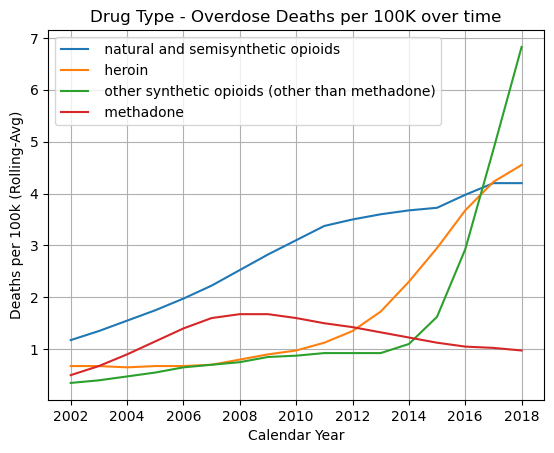

In [16]:
#(3.2.1 continuation...plotting)
#Plotting overdose deaths per 100k (Rolling 4-yr-Avg) with drug type breakdown
labels=ddf9['PANEL1'].unique()
labels=labels.tolist()
data = {}
x = ddf9['YEAR'].unique()

#Setting up loop in order to be able to plot the different [PANEL1] values (i.e. drug types) separately under same x-axis.
for label in labels:
    ddff=ddf9[ddf9['PANEL1']==label]
    y=ddff['Rolling_Average']
    data[label]=y
    
for label, y in data.items():
    plt.plot(x, y, label=label)

plt.legend()
plt.title('Drug Type - Overdose Deaths per 100K over time')
plt.xlabel('Calendar Year')
plt.ylabel('Deaths per 100k (Rolling-Avg)')
plt.grid(True)

3.2.2) The below formulas combined with the original datasource are used to build a simplified view on the changes of overdose deaths across drug groups pre vs post 2014.

In [17]:
#(3.2.2)

#Creating formula to group the rolling avg between 2015_2018 and 2010_2013 at drug type level to be set-up in separate columns on the dataset
def panel_roll_avg_2018(a):
    m=ddf9[(ddf9['PANEL1']==a) & (ddf9['YEAR']==2018)]
    return round(float(m['Rolling_Average']),1)

def panel_roll_avg_2013(a):
    m=ddf9[(ddf9['PANEL1']==a) & (ddf9['YEAR']==2013)]
    return round(float(m['Rolling_Average']),1)

ddf9['Rolling_2015_2018'] = ddf9['PANEL1'].apply(panel_roll_avg_2018)
ddf9['Rolling_2010_2013'] = ddf9['PANEL1'].apply(panel_roll_avg_2013)

ddf9['diff']=ddf9['Rolling_2015_2018']-ddf9['Rolling_2010_2013']
#ddf9['Rolling_2015_2018']-ddf9['Rolling_2010_2013']

ddf9=ddf9[['PANEL1','Rolling_2015_2018','Rolling_2010_2013','diff']]


m9=ddf9.sort_values(by='diff',ascending=False)
m9.drop_duplicates()

,PANEL1,Rolling_2015_2018,Rolling_2010_2013,diff
4378,other synthetic opioids (other than methadone),6.8,0.9,5.9
5366,heroin,4.5,1.7,2.8
2408,natural and semisynthetic opioids,4.2,3.6,0.6
3381,methadone,1.0,1.3,-0.3


### Drug Type: Key Insight
Based on the increment in [Diff]; [Other Synthetic opioids] and [Heroin] were the most influential drugs in the increase of mortality post 2014.

# Step 3.3: Gender & Race Trend

In [30]:
#3.3.1) Filtered the dataset to capture the data that groups overdose deaths by Gender & Race. Then plotting results.

ddf99=df5[(df5['PANEL_NUM']==0) 
          & (df5['STUB_NAME']=='Sex and race')] #filter to be able to identify overdose by sex & race breakdown.

ddf99=ddf99[['YEAR','STUB_LABEL','ESTIMATE']]
ddf99=ddf99.sort_values(by='YEAR',ascending=True)
#Below calculating rolling_Avg based on trailing 4 years and grouped by the STUB_LABEL DIMENSION (i.e. Gender & Race).
ddf99['Rolling_Average'] = ddf99.groupby(['STUB_LABEL'])['ESTIMATE'].rolling(4).mean().reset_index(0, drop=True)
ddf99.head(5)

,YEAR,STUB_LABEL,ESTIMATE,Rolling_Average
58,1999,Male: White,8.1,NaN
98,1999,Male: American Indian or Alaska Native,5.7,NaN
178,1999,Female: American Indian or Alaska Native,4.6,NaN
118,1999,Male: Asian or Pacific Islander,1.5,NaN
198,1999,Female: Asian or Pacific Islander,1.0,NaN


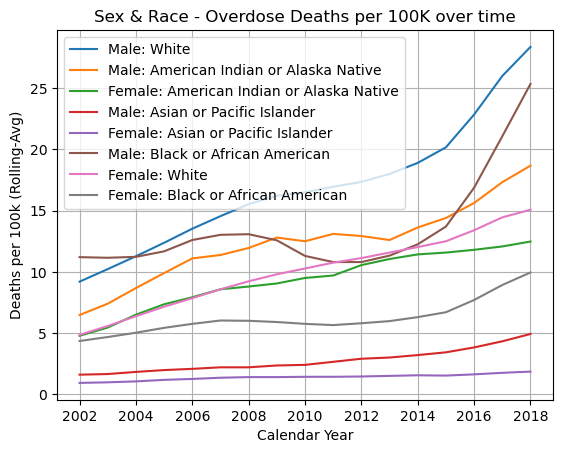

In [26]:
#3.3.1 continuatiuon plotting

#Plotting overdose deaths per 100k (Rolling 4-yr-Avg) with Race & Sex values breakdown
labels=ddf99['STUB_LABEL'].unique()
labels=labels.tolist()
data = {}
x = ddf99['YEAR'].unique()


#Setting up loop in order to be able to plot the different [STUB_LEVEL] values (i.e. Race & Sex groups) separately under same x-axis.
for label in labels:
    ddff=ddf99[ddf99['STUB_LABEL']==label]
    y=ddff['Rolling_Average']
    data[label]=y
    
for label, y in data.items():
    plt.plot(x, y, label=label)

plt.legend()
plt.title('Sex & Race - Overdose Deaths per 100K over time')
plt.xlabel('Calendar Year')
plt.ylabel('Deaths per 100k (Rolling-Avg)')
plt.grid(True)

3.3.2) The below formulas combined with the original datasource are used to build a simplified view on the changes of overdose deaths across Race & Sex groups pre vs post 2014.

In [24]:
#3.3.2 formula setting and table set-up

#Creating formula to group the rolling avg between 2015_2018 and 2010_2013 at race & sex level to be set-up in separate columns on the dataset
def race_roll_avg_2018(a):
    m=ddf99[(ddf99['STUB_LABEL']==a) & (ddf99['YEAR']==2018)]
    return round(float(m['Rolling_Average']),1)

def race_roll_avg_2013(a):
    m=ddf99[(ddf99['STUB_LABEL']==a) & (ddf99['YEAR']==2013)]
    return round(float(m['Rolling_Average']),1)


ddf99['Rolling_2015_2018'] = ddf99['STUB_LABEL'].apply(race_roll_avg_2018)
ddf99['Rolling_2010_2013'] = ddf99['STUB_LABEL'].apply(race_roll_avg_2013)
ddf99['Diff']=ddf99['Rolling_2015_2018']-ddf99['Rolling_2010_2013']
ddf99=ddf99[['STUB_LABEL','Rolling_2015_2018','Rolling_2010_2013','Diff']]

df_no_duplicates2 = ddf99.drop_duplicates() #dropping repetitions of the same value
df_no_duplicates2=df_no_duplicates2.sort_values(by='Diff',ascending=False)
df_no_duplicates2[:3]

,STUB_LABEL,Rolling_2015_2018,Rolling_2010_2013,Diff
78,Male: Black or African American,25.4,11.3,14.1
58,Male: White,28.4,18.0,10.4
98,Male: American Indian or Alaska Native,18.7,12.6,6.1


### Gender & Race: Key Insight
[Male: White] and [Male: Black or African American] had the biggest increase in mortality post 2014.

## Conclusions: Final Insights

##### Research Question: Has there been any changes on drug overdose deaths in the US over the years?


Even though overdose death rates continously increased over the years, this was especially prominent after 2014. <br> (Based on trailling 4 years view: 2015-2018 vs 2010-2013 ).

This prominent increment post 2014 was mostly influenced by:
1. Increment in [Synthetic opioids] and [Heroin] drugs death rates.

This for which the below groups became incrementally vulnerable post 2014:
1. Age groups: [25-44 years]
2. Race and Sex: [Males] both [Black or African American] and [White]
